In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import imageio.v2 as imageio  #To get image form image url

In [3]:
df_observations = pd.read_csv('observations.csv',sep='\t')
df_images_observation = pd.read_csv('images_observations.csv',sep='\t')
df_locations = pd.read_csv('locations.csv',sep='\t')
df_names = pd.read_csv('names.csv',sep='\t')
df_name_descriptions = pd.read_csv('name_descriptions.csv',sep='\t')


In [4]:
obs_ids = df_observations[(df_observations.name_id == 1)].id.values

df_images_observation[df_images_observation.observation_id.isin(obs_ids)].image_id.values


array([  12571,   12572,   14366, ..., 1544624, 1544625, 1544626],
      dtype=int64)

In [6]:
def get_image_name_from_name_id(name_id=1):
    name = df_names[(df_names.id == name_id)].text_name.values[0]
    obs_ids = df_observations[(df_observations.name_id == name_id)].id.values
    img_ids = df_images_observation[df_images_observation.observation_id.isin(obs_ids)].image_id.values
    urls = ['https://mushroomobserver.org/images/{0}?q=1oIvI'.format(img_id) for img_id in img_ids]
    urls_img = ['https://images.mushroomobserver.org/320/{0}.jpg'.format(img_id) for img_id in img_ids]
    return name,urls,urls_img

Mycena oregonensis
https://mushroomobserver.org/images/239?q=1oIvI


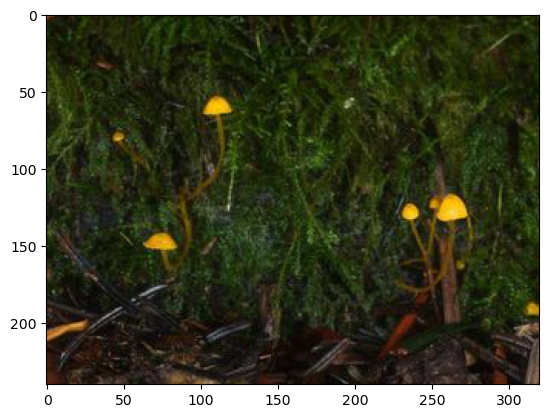

In [7]:
name,urls,urls_img = get_image_name_from_name_id(150)
print(name)
print(urls[0])
image = imageio.imread(urls_img[0])
plt.imshow(image)

In [8]:
df_names.text_name.value_counts()[df_names.text_name.value_counts() >1]

Amanita series             7
Calicium lenticulare       4
Agaricales                 4
Amanita bulbosa            4
Amanita farinosa           4
                          ..
Psathyrella romagnesii     2
Spinellus rhombosporus     2
Cortinarius canarius       2
Ramariopsis laeticolor     2
Psathyrella rhombispora    2
Name: text_name, Length: 737, dtype: int64

In [21]:
df_names[(df_names.text_name == 'Trametes')]

,id,text_name,author,deprecated,correct_spelling_id,synonym_id,rank
819,889,Trametes,Fr.,0,NaN,9695.0,9


In [28]:
df_names[(df_names.text_name == 'Artolenzites')]

,id,text_name,author,deprecated,correct_spelling_id,synonym_id,rank
46453,52126,Artolenzites,Falck,1,NaN,9695.0,9


Fungi
https://mushroomobserver.org/images/14366?q=1oIvI


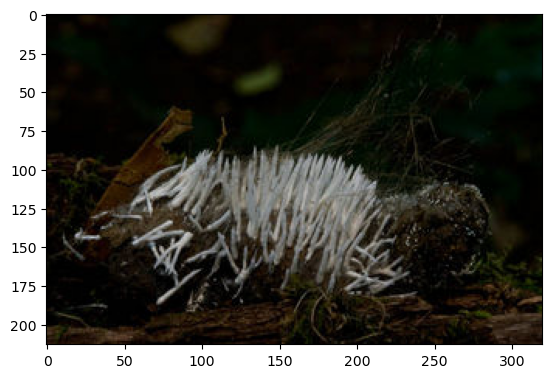

In [57]:
name,urls,urls_img = get_image_name_from_name_id(1)
print(name)
print(urls[2])
image = imageio.imread(urls_img[2])
plt.imshow(image)

In [139]:
df_names.id.value_counts()

1         1
49371     1
49341     1
49342     1
49343     1
         ..
24302     1
24303     1
24304     1
24305     1
112255    1
Name: id, Length: 66116, dtype: int64

In [156]:
df_names.text_name.value_counts()

Amanita series           7
Calicium lenticulare     4
Agaricales               4
Amanita bulbosa          4
Amanita farinosa         4
                        ..
Uredinales               1
Naohidemyces             1
Naohidemyces vaccinii    1
Physarum nucleatum       1
Amanita floridella       1
Name: text_name, Length: 65322, dtype: int64

In [19]:
df_names[df_names.text_name == 'Lenzites']

,id,text_name,author,deprecated,correct_spelling_id,synonym_id,rank
753,817,Lenzites,Fr.,1,NaN,9695.0,9


In [177]:
name,urls,urls_img = get_image_name_from_name_id(52133)
urls[0]

'https://mushroomobserver.org/images/791756?q=1oIvI'

In [150]:
df_names['Genus'] = df_names.text_name.str.split(' ').apply(lambda x:x[0])

In [155]:
df_names.Genus.value_counts()

Phyllosticta       2493
Russula            1651
Amanita            1518
Mycosphaerella     1357
Lactarius          1171
                   ... 
Leipota               1
Synnematous           1
Gallerina             1
Psathyrellaceae       1
Shellie               1
Name: Genus, Length: 6372, dtype: int64

In [154]:
df_names.Genus.value_counts()[df_names.Genus.value_counts() > 1]


Phyllosticta      2493
Russula           1651
Amanita           1518
Mycosphaerella    1357
Lactarius         1171
                  ... 
Chaetomium           2
Davidiella           2
Trametopsis          2
Oidiodendron         2
Ginnsia              2
Name: Genus, Length: 3913, dtype: int64

In [18]:
df_name_descriptions

,id,name_id,source_type,source_name,general_description,diagnostic_description,distribution,habitat,look_alikes,uses,notes,refs
0,6,13,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Images of Myxomycetes,NaN
1,\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"\n1. ""http://naturalhistory.uga.edu/~GMNH/Myco...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,\nColor Photo Gallery of Myxomycetes at the Ge...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
45248,\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45249,"\nMicroscopically, the species is distinguishe...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45250,\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45251,\nP. flammipes is confined to southern South A...,NaN,NaN,http://iucn.ekoo.se/iucn/species_view/531297/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
